/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv
['20210621_1_QT6__UV__ON__137mA__50_Ohm_.dat', '20210621_1_QT6__UV__ON__137mA__50_Ohm__LOG.txt'] 

Index(['S1C1', 'S1C2', 'S2C1', 'S2C2', 'S3C1', 'S3C2', 'Unnamed: 6'], dtype='object')


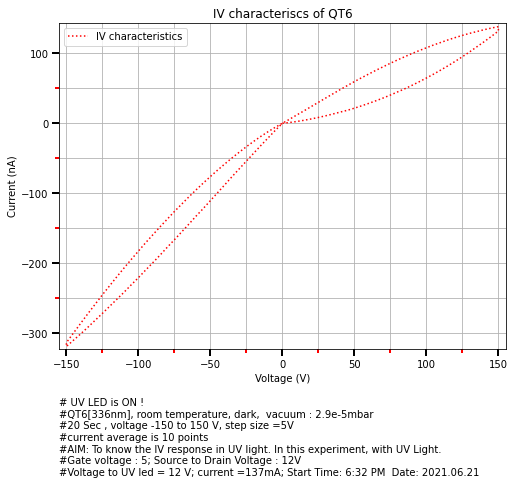

In [296]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import walk
import os
import math
##----------------------------------------------------
## Program to read data.
dir_location = os.getcwd() # To get the current working directory.
#dir_location = os.path.dirname(__file__) #Not working in Jupyter-notbook (website: urle.me/cY1)
location = os.path.join(dir_location, 'data_iv') #joining the current working directory to a new folder "data_iv"
print(location)
for (dirpath, _, filenames) in walk(location):
    print(filenames,'\n')
    data = pd.read_table(r'/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv/20210621_1_QT6__UV__ON__137mA__50_Ohm_.dat')
    data = pd.DataFrame(data).drop([0])
    data =data.astype(float)

information_file = open(r'/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv/20210621_1_QT6__UV__ON__137mA__50_Ohm__LOG.txt','r')
lines = information_file.readlines()
    #    print(pd.DataFrame(data))
##-----------------------------------------------------

print(data.columns) # To know the name of the columns
#print(data.index)   # To know the number of rows
#x = data[data.columns[0]][1:].astype(float).array
#y = data[data.columns[1]][1:].astype(float).array
#plot(x,y)
#data[data.columns[0]][1:]
#data.plot(x='S1C1',y='S1C2')

# data.plot(x='S1C1', y='S1C2')
# data.plot(x='S2C1', y='S2C2')
# data.plot(x='S3C1', y='S3C2')

total_x_axis = (data['S1C1'].append(data['S2C1'])).append(data['S3C1'])
total_y_axis = (data['S1C2'].append(data['S2C2'])).append(data['S3C2'])
current_unit = 1e-9 #Selecting the current unit.

###---------------------------------------
### For ploting
# plt.figure(figsize=(8,6))



# plt.title("IV characteriscs of QT6")
# plt.plot(total_x_axis, total_y_axis/current_unit, label="IV characteristics")
# plt.grid(True)
# plt.xlabel('Voltage (V)')
# plt.ylabel('Current (nA)')
# plt.ylim(math.floor(min(data['S2C2'])/current_unit)-5,math.ceil(max(data['S2C2'])/current_unit)+5)
# plt.xlim((min(data['S2C1'])-5),5+(max(data['S2C1'])))
# plt.legend()
# plt.show()
left, width = 0.0, 0.0
bottom, height = -0.15, 0.0

fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("IV characteriscs of QT6")
ax.plot(total_x_axis, total_y_axis/current_unit, 'r:',label="IV characteristics",)
ax.grid(which='both')
#ax.set_xlabel('Voltage (V)\n\n'+information)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (nA)')
#ax.text(left,bottom,information)

ax.text(left, bottom, information, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

ax.set_ylim(math.floor(min(data['S2C2'])/current_unit)-5,math.ceil(max(data['S2C2'])/current_unit)+5)
ax.set_xlim((min(data['S2C1'])-5),5+(max(data['S2C1'])))
ax.legend()

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

plt.show()
###---------------------------------------



In [297]:
### Program to get the condition of the experiment from the LOG file.
information = ''
count = 0
for line in lines:

    if "#$" in line:
        count +=1
    if count % 2 != 0:
        if "#$" in line :
            continue
        else:
            information += line
    
#print(information)

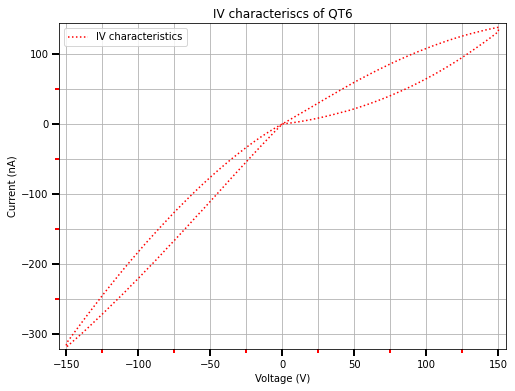

In [298]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("IV characteriscs of QT6")
ax.plot(total_x_axis, total_y_axis/current_unit, 'r:',label="IV characteristics")
ax.grid(which='both')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (nA)')
ax.set_ylim(math.floor(min(data['S2C2'])/current_unit)-5,math.ceil(max(data['S2C2'])/current_unit)+5)
ax.set_xlim((min(data['S2C1'])-5),5+(max(data['S2C1'])))
ax.legend()

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

plt.show()

In [247]:
#print(information)
information = ''
count = 0
for line in lines:

    if "#$" in line:
        count +=1
    if count % 2 != 0:
        if "#$" in line :
            continue
        else:
            information += line
    
print(information)

# UV LED is ON !
#QT6[336nm], room temperature, dark,  vacuum : 2.9e-5mbar
#20 Sec , voltage -150 to 150 V, step size =5V
#current average is 10 points
#AIM: To know the IV response in UV light. In this experiment, with UV Light.
#Gate voltage : 5; Source to Drain Voltage : 12V
#Voltage to UV led = 12 V; current =137mA; Start Time: 6:32 PM  Date: 2021.06.21

